In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read data file using Pandas  
mu_data=pd.read_csv('mushrooms.csv')

In [3]:
mu_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
print(mu_data.shape)

(8124, 23)


In [5]:
print(mu_data.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [6]:
print(mu_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [7]:
# using isnull() function for finding null values   
print(mu_data.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


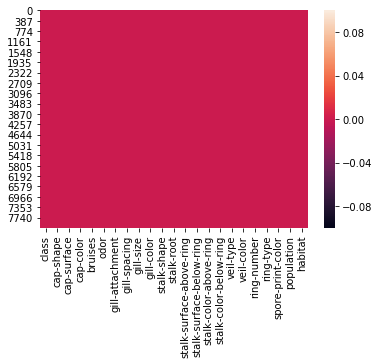

In [8]:
# Visual Representation for finding null values using Heat Map
sns.heatmap(mu_data.isnull())
plt.show()

In [9]:
mu_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
print(mu_data.nunique())

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


In [11]:
mu_data1 = mu_data['class'].to_frame()
mu_data1.head()

,class
0,p
1,e
2,e
3,p
4,e


In [12]:
# Count the edible=e, poisonous=p 
c_count=mu_data['class'].value_counts()
print(c_count)

e    4208
p    3916
Name: class, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

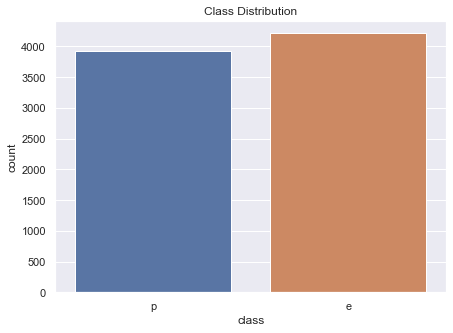

In [13]:
# Visual Representation of the dependent variable distribution in the dataset
sns.set(rc={'figure.figsize':(7,5)})
class_c=mu_data['class']
mu_data_count=sns.countplot(x=class_c, data=mu_data)
plt.title("Class Distribution")

In [14]:
#Visualize/Analysis how each independent variables affects the dependent variable
def plot_feature(class_target, feature_set):
    for k, col in enumerate(mu_data.columns):
        plt.figure(k)
        sns.set(rc={'figure.figsize': (12,9)})
        sns.set(style="whitegrid")
        c_count=sns.countplot(x=mu_data[col], hue=class_target, data=mu_data)        

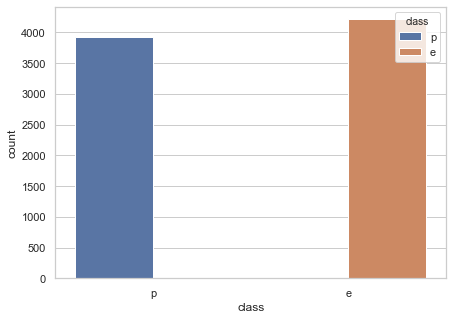

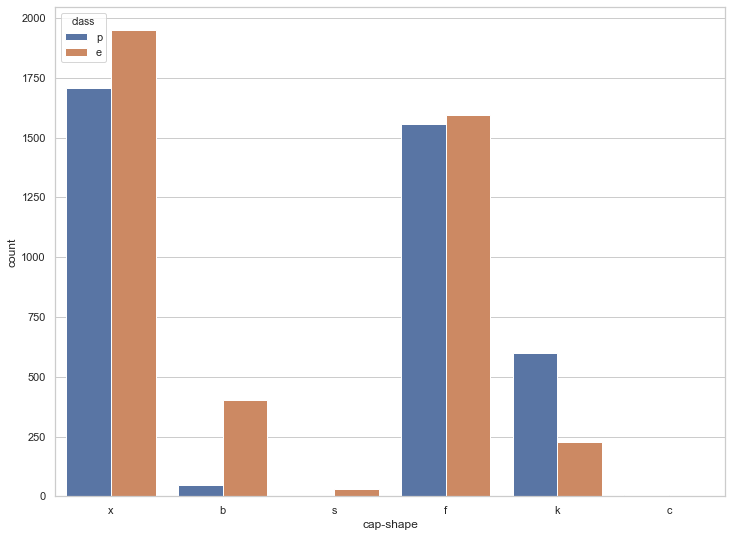

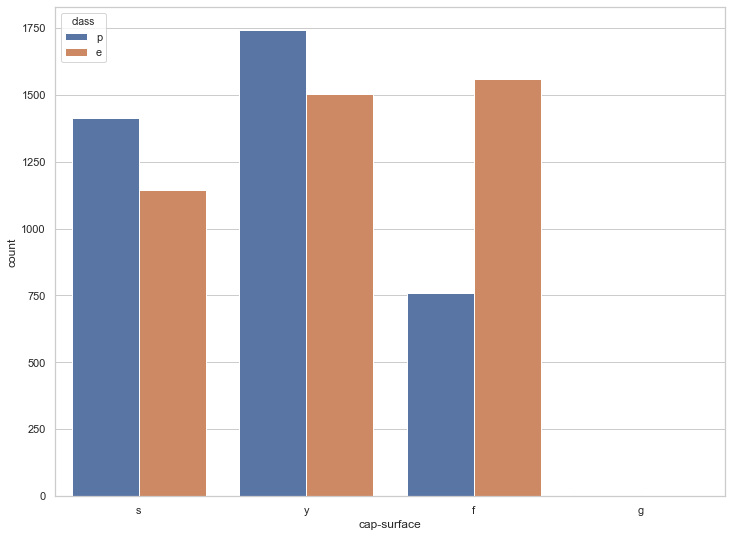

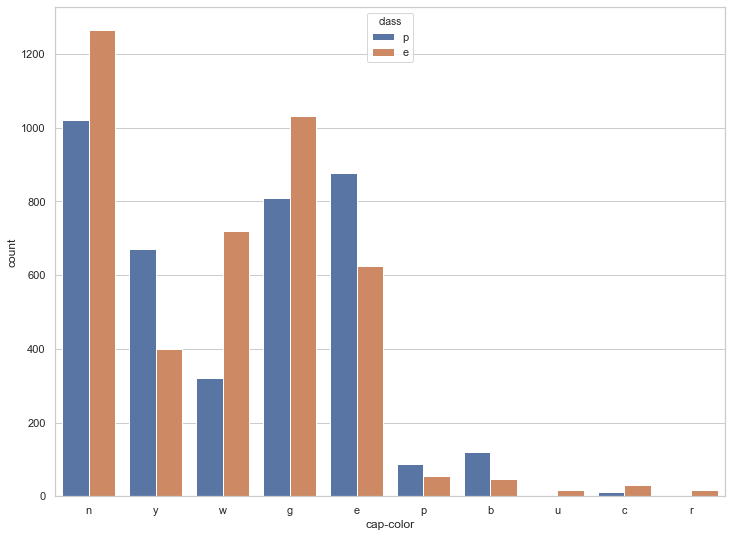

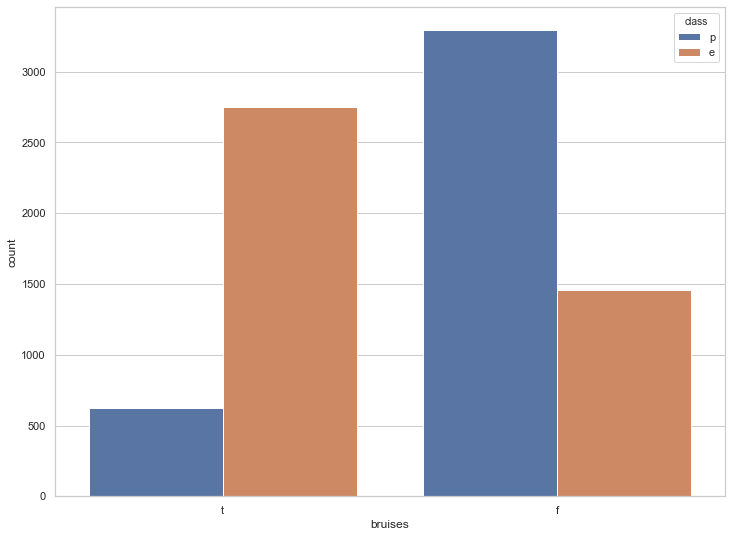

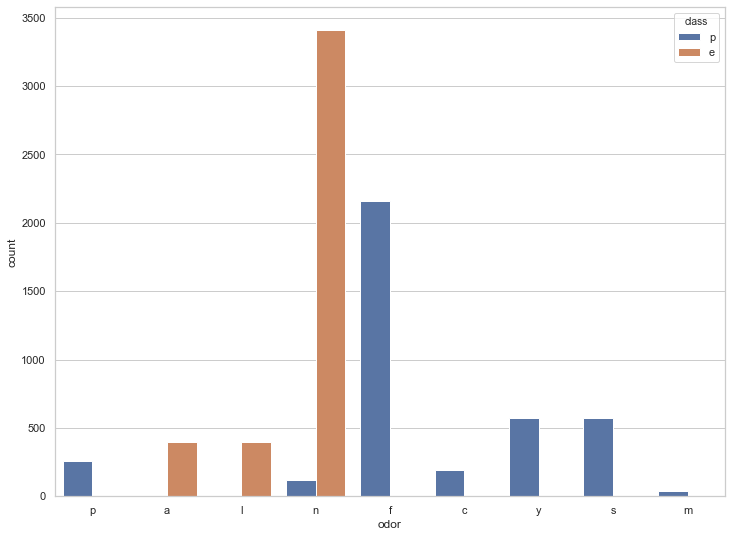

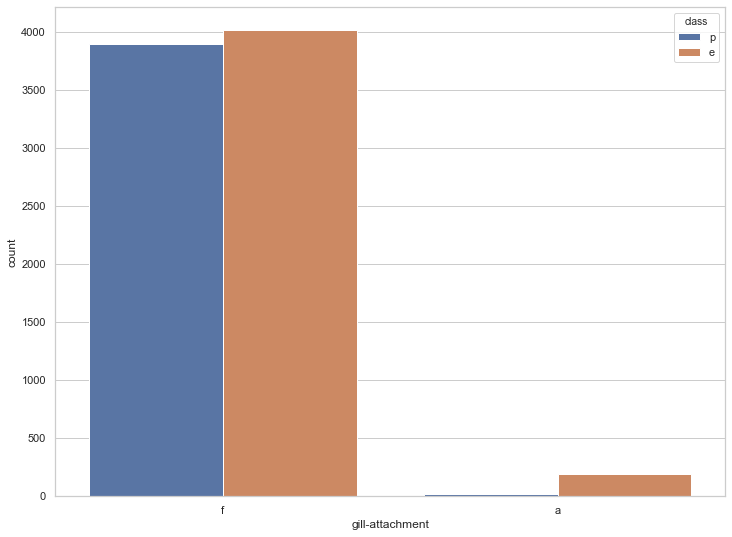

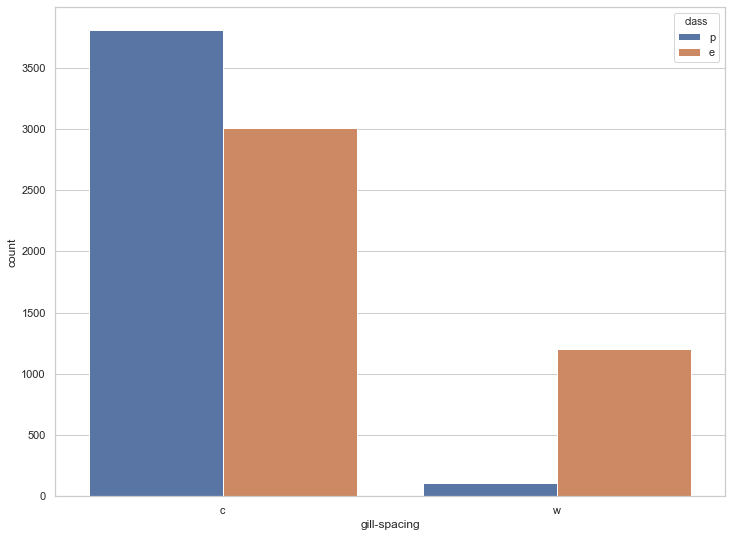

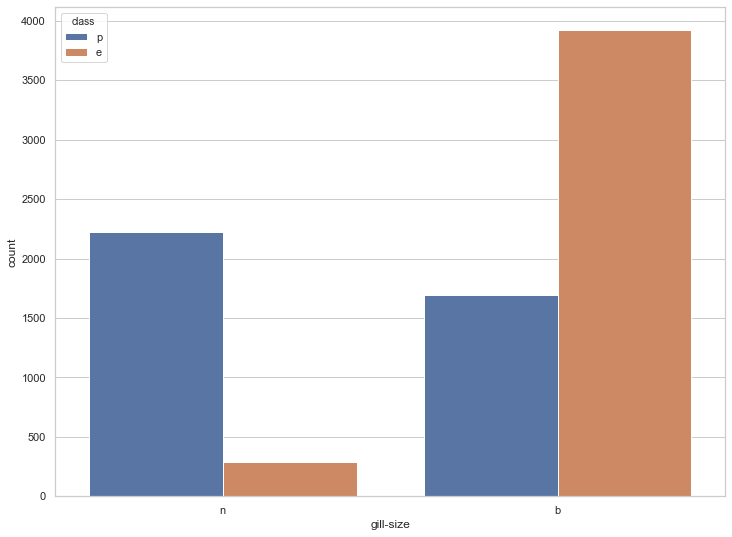

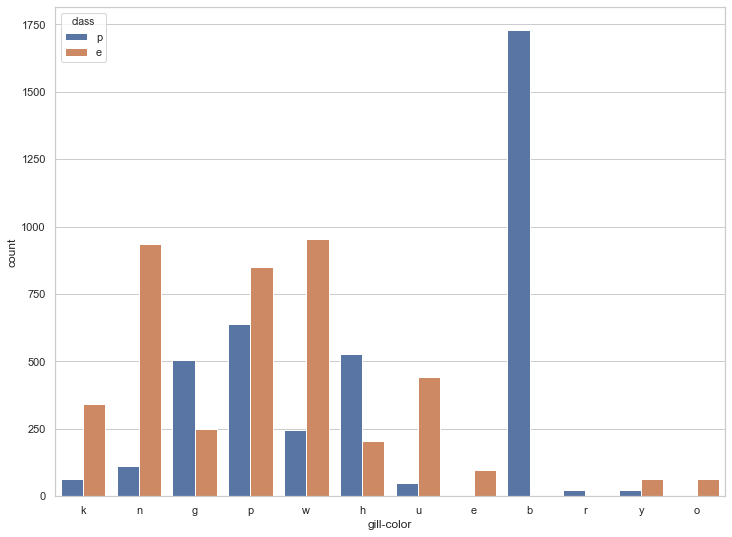

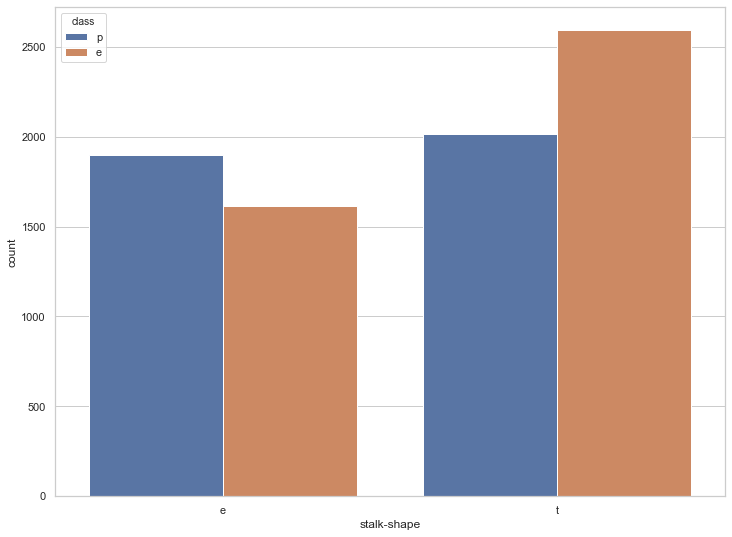

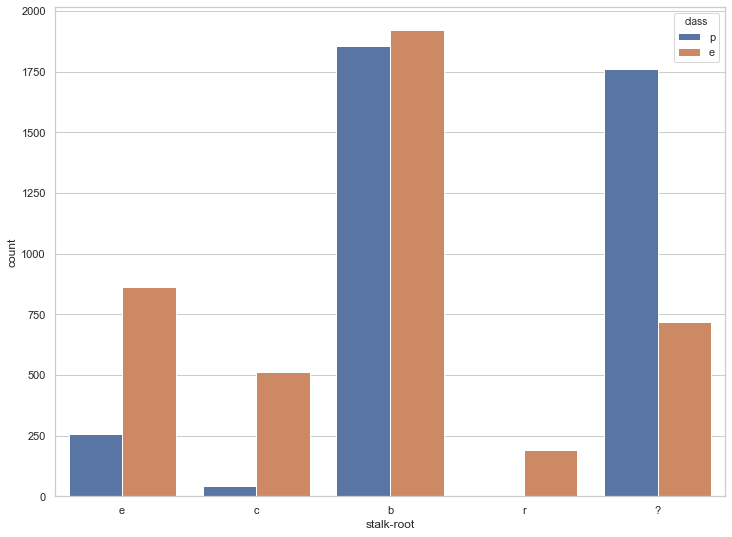

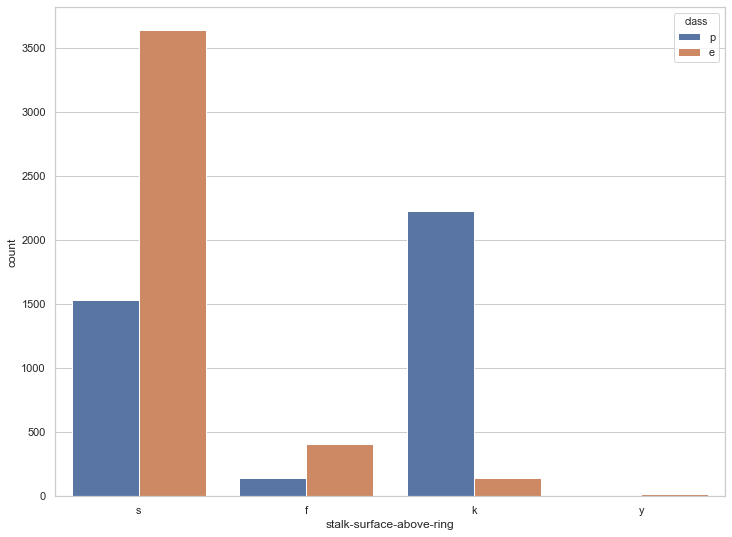

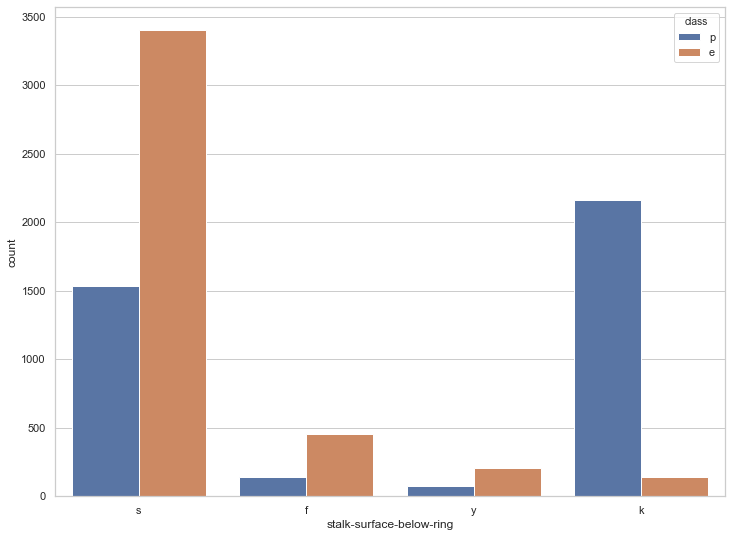

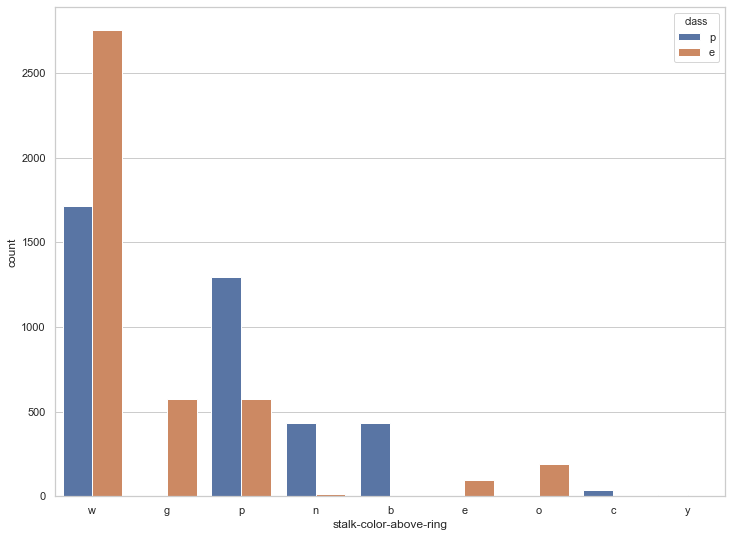

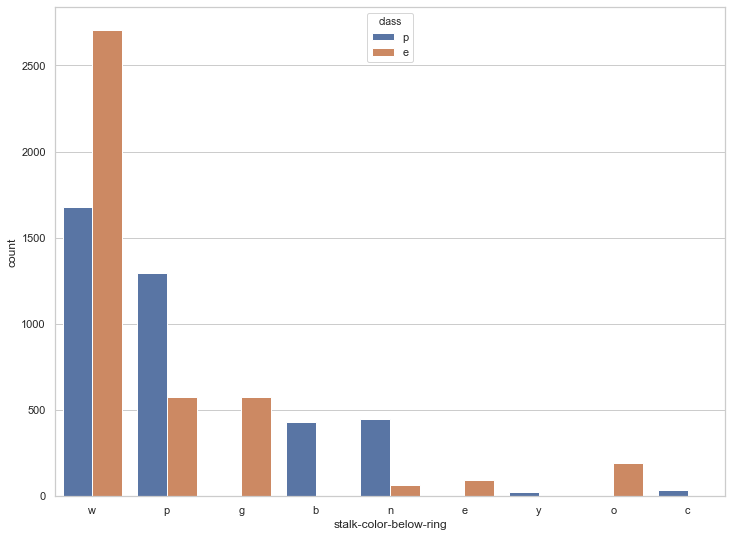

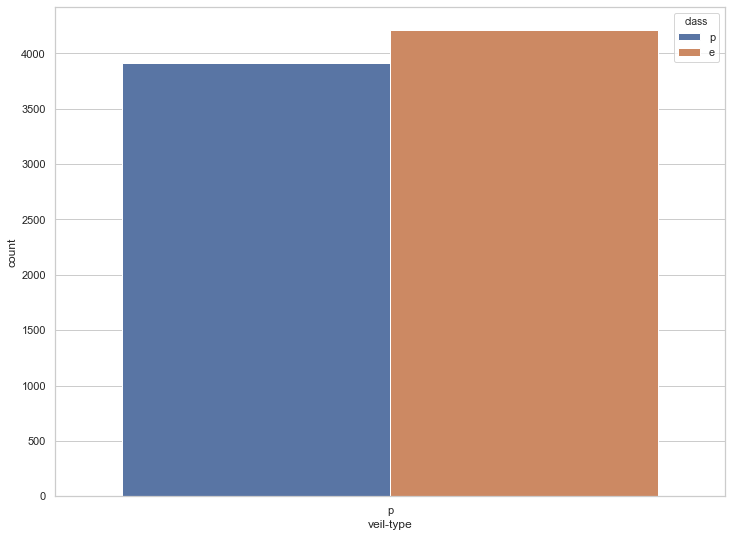

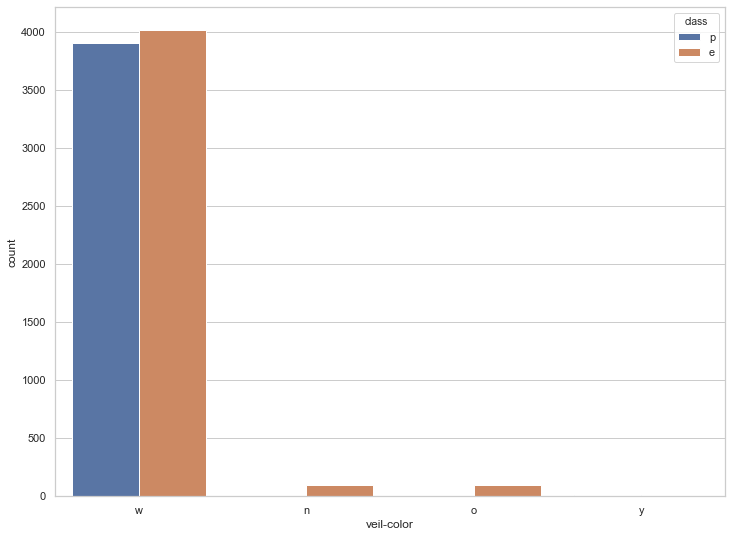

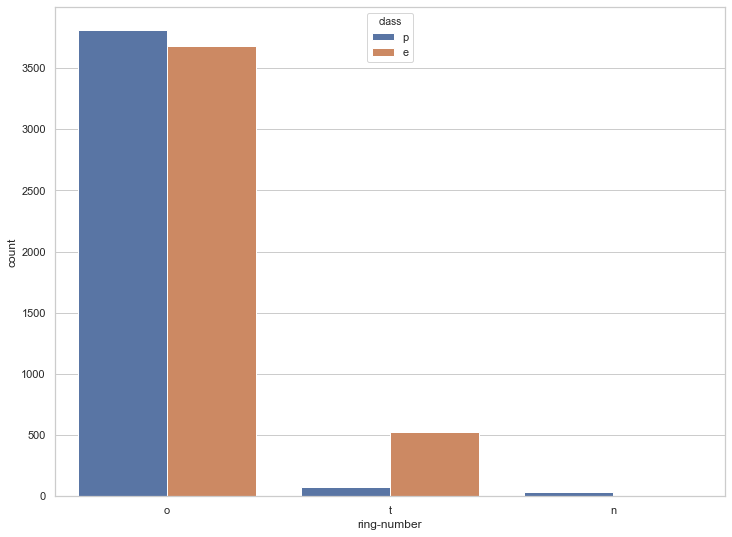

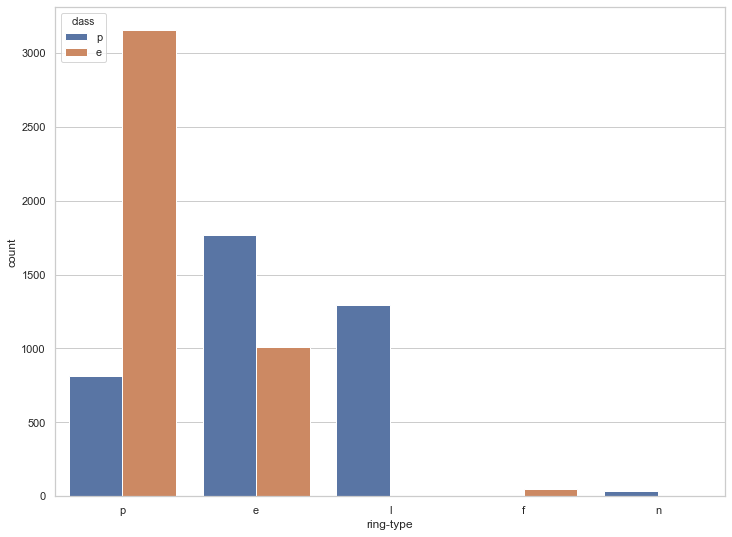

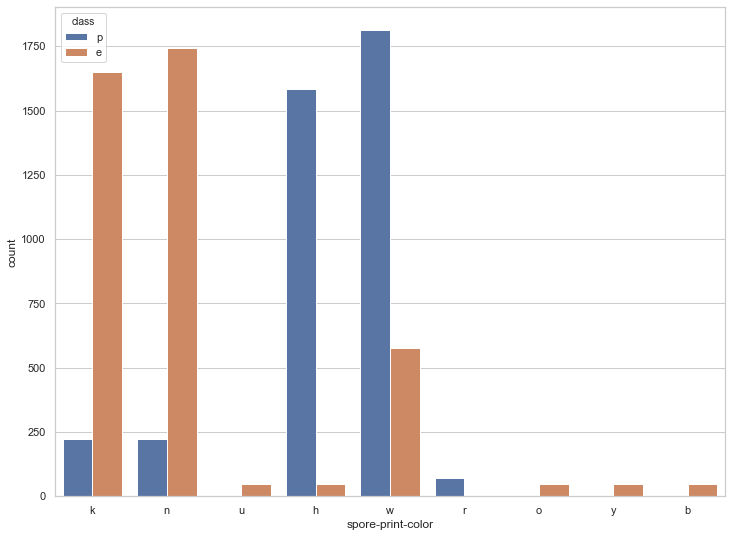

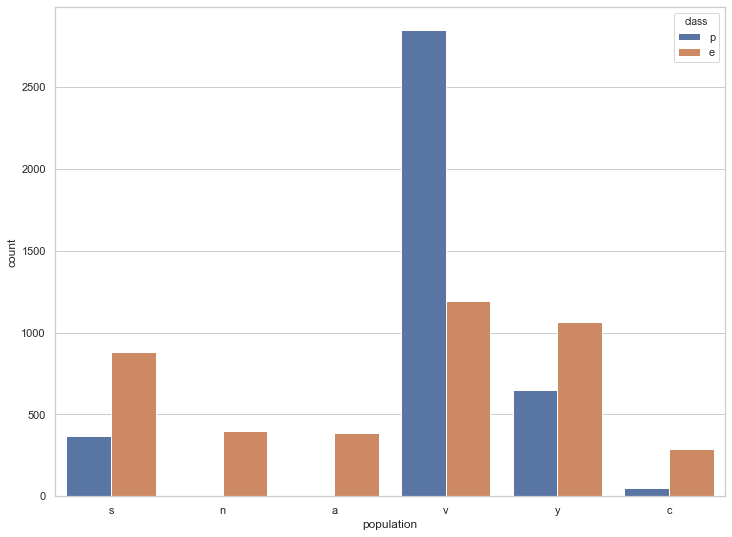

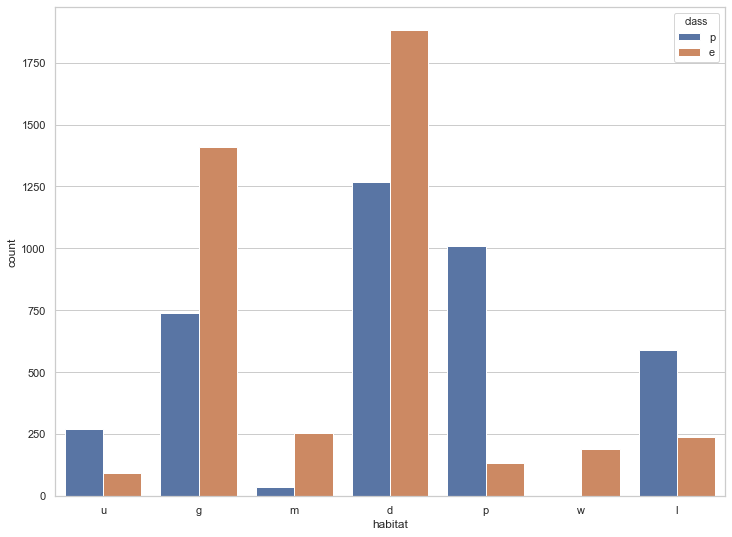

In [15]:
#Plot all graphs
class_c=mu_data['class']
feature_to_plot=mu_data.drop('class', axis=1)
plot_feature(class_c, feature_to_plot)

In [16]:
# Seprate Data into features and target set
feature_data=mu_data.drop('class', axis=1)
target_class=mu_data['class']
print(feature_data.shape)
print(target_class.shape)

(8124, 22)
(8124,)


In [17]:
# Import Label Encoders for Target and Feaature variables Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [18]:
# Label Encoder used for the Target class
le=LabelEncoder()
mu_data['class']= le.fit_transform(mu_data['class'])
mu_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,0,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,0,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,0,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,1,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,0,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [19]:
# One hot encoding applied to feature variables
feature_data= pd.get_dummies(feature_data)
feature_data

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature_data_std = sc.fit_transform(feature_data)

In [21]:
# Reshape the target variable 
target_class=mu_data['class'].values.reshape(-1,1)
print(target_class.shape)

(8124, 1)


In [48]:
#Here we will find out random state value with which our linear model learns maximum
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
max_r_score=0
for r_state in range(42,200):
    x_train, x_test, y_train, y_test = train_test_split(feature_data_std, target_class ,random_state = r_state,test_size=0.30)
    lda = LinearDiscriminantAnalysis(solver='lsqr')
    lda.fit(x_train,y_train)
    y_pred = lda.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

max r2 score corresponding to  42  is  1.0


In [49]:
# Evaluate cross validation score to find out the overfitting or underfitting issues while training 
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(LinearDiscriminantAnalysis(solver='lsqr'),feature_data_std, target_class,cv=5,scoring="r2")
print("Cross Validation score for 5 iternations: {}%".format (cross_val_score.mean())) 

Cross Validation score for 5 iternations: -1.180492478179479%


In [50]:
#Finalise the model 
x_train, x_test, y_train, y_test = train_test_split(feature_data_std, target_class, random_state = 44,test_size=0.30)
lda = LinearDiscriminantAnalysis(solver='lsqr')
lda.fit(x_train,y_train)
y_pred = lda.predict(x_test)

In [51]:
#Findout the rmse and r2 score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred) )

RMSE is:  0.0
r2_score is:  1.0


In [32]:
print("*Test Accuracy: {}%".format(round(lda.score(x_test,y_test)*100,2)))

*Test Accuracy: 100.0%


In [33]:
#false positive and false negative rates are 0, meaning that all mushrooms were correctly classified as poisonous or not
print("*Confusion Matrix: \n {}".format (confusion_matrix(y_test,y_pred)))

*Confusion Matrix: 
 [[1228    0]
 [   0 1210]]


In [52]:
print("Classification Report: \n {}".format (classification_report(y_test,y_pred)))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1228
           1       1.00      1.00      1.00      1210

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



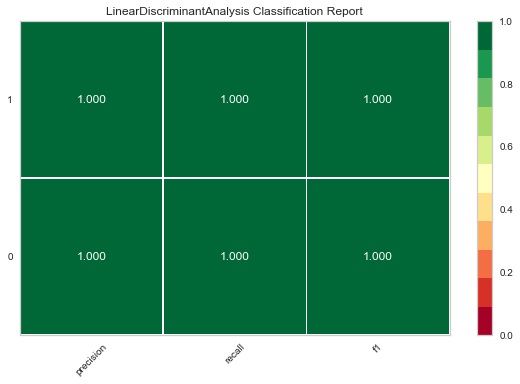

In [56]:
#The classification report visualizer displays the precision, recall, F1, and support scores for the model.
from yellowbrick.classifier import ClassificationReport
mu_viz = ClassificationReport(LinearDiscriminantAnalysis(solver='lsqr'), cmap='RdYlGn')
mu_viz.fit(x_train, y_train)
mu_viz.score(x_test, y_test)
mu_viz.show()

ROC Score:  1.0


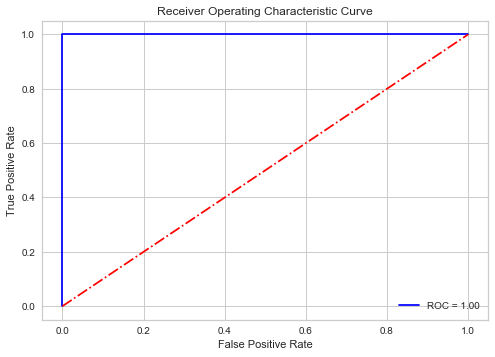

In [54]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#Area under the ROC curve for LogisticRegression
lda_Reg_ROC_Curve=metrics.roc_auc_score(y_test,y_pred)
print("ROC Score: ", lda_Reg_ROC_Curve)

# Define Function to plot the ROC curve 
def plot_roc_curve(roc_auc):
    plt.plot(fp_rate, tp_rate, color='blue', label='ROC = %0.2f' % lda_Reg_ROC_Curve)
    plt.plot([0, 1], [0, 1], color='red', linestyle='-.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

# Plot AUC_ROC curve 
fp_rate, tp_rate, thresholds= roc_curve(y_test, y_pred)
roc_auc=auc(fp_rate, tp_rate)
plot_roc_curve(roc_auc)

In [55]:
# Lastly Save the model for futher use
from sklearn.externals import joblib  
joblib.dump(lda, 'Mushrooms_poisonous_nonpoisonous.pkl')

['Mushrooms_poisonous_nonpoisonous.pkl']